In [1]:
from sklearn.model_selection import train_test_split
import tensorflow as tf



In [2]:
import sys
sys.path.insert(1, '../Pre Processing Stage/')
sys.path.insert(1, '../Processing Stage/HoG')


from commonfunctions import *
from main import *
from hog import *

In [3]:
final_hog=np.load('./numpyArrays/final_hog.npy' )



In [4]:
final_lbp_flattened=np.load('./numpyArrays/final_lbp_flattened.npy')
targets=np.load('./numpyArrays/targets_lbp.npy')



In [5]:
final=[]

for l,h in zip(final_lbp_flattened,final_hog):
    final.append(np.concatenate([l,h],axis=0))

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from tensorflow import keras

In [7]:
classifiers1 = {
    'SVM': SVC(random_state=40,kernel='poly'),
   
    
}

In [8]:
classifiers2 = {
    'KNN': KNeighborsClassifier(n_neighbors=7),
    
    
}

In [9]:
classifiers3 = {
    
    'rnd': RandomForestClassifier(random_state=40),
   
    
}

In [10]:
classifiers4 = {
    
    'voting_clf_soft' : VotingClassifier(
    estimators=[
        ('KNN', KNeighborsClassifier(n_neighbors=7)),
        ('rf', RandomForestClassifier(random_state=42)),
        ('svc', SVC(random_state=42,probability=True))
    ],
    voting='soft'), 
   
    
}

In [11]:
classifiers5 = {
  
    'voting_clf_hard': VotingClassifier(
    estimators=[
            ('KNN', KNeighborsClassifier(n_neighbors=7)),
            ('rf', RandomForestClassifier(random_state=42)),
            ('svc', SVC(random_state=42))
        ],
    voting='hard'),
    
}

In [12]:
from sklearn.metrics import confusion_matrix
import copy
from sklearn.metrics import precision_score, recall_score, f1_score


def train_model(x, y, testSize, classifiers):
    models = []
    mats = []
    precisions = []
    recalls = []
    f1s = []

    X_train, X_test, y_train, y_test = train_test_split(
        x, y, test_size=testSize, stratify=y)

    for model_name, model in copy.deepcopy(classifiers).items():

        print('############## Training', model_name, "##############")
        model.fit(X_train, y_train)

        accuracy = model.score(X_test, y_test)

        models.append({model_name: model})

        print(model_name, 'accuracy:', accuracy*100, '%')
        y_pred = model.predict(X_test)

        mat = confusion_matrix(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='micro')
        recall = recall_score(y_test, y_pred, average='micro')
        f1 = f1_score(y_test, y_pred, average='micro')

        mats.append(mat)
        precisions.append(precision)
        recalls.append(recall)
        f1s.append(f1)

        print(mat)

    return models, mats, precisions, recalls, f1s

In [13]:
modelnames = ['SVM', 'KNN', 'rnd', 'voting_clf_soft', 'voting_clf_hard']

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
def getFigures(conMat, modelname, p, r, f1):
    plt.figure()

    sns.heatmap(conMat, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(f"Confusion Matrix ({modelname} - Combined)")
    # plt.show()

    plt.savefig(f"./figures/Confusion Matrix ({modelname} - Combined)")
    plt.figure()

    plt.bar(["Precision", "Recall", "F1 Score"],
            [p, r, f1])
    plt.ylabel("Score")
    plt.title(f"Model Performance Metrics ({modelname} - Combined)")
    # plt.show()
    plt.savefig(
        f"./figures/Model Performance Metrics ({modelname} - Combined)")

In [16]:
final_models1,confusion_matrices,precisions,recalls,f1s = train_model(final,targets,0.2,classifiers1)

############## Training SVM ##############
SVM accuracy: 100.0 %
[[17  0  0]
 [ 0 21  0]
 [ 0  0 20]]


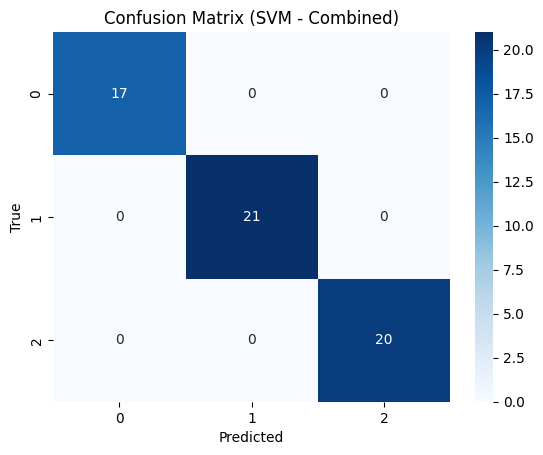

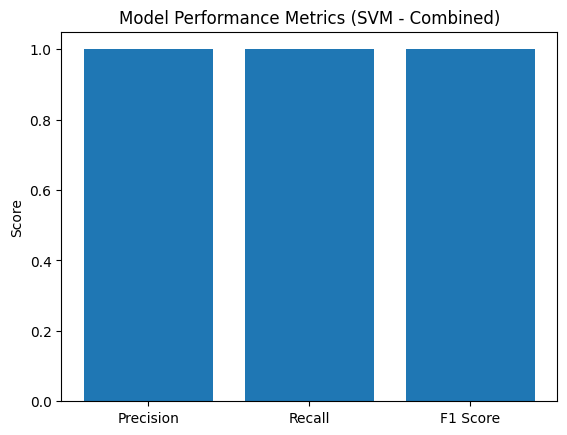

In [17]:
getFigures(confusion_matrices[0], "SVM",precisions[0],recalls[0],f1s[0])

In [18]:
final_models2,confusion_matrices,precisions,recalls,f1s = train_model(final,targets,0.2,classifiers2)

############## Training KNN ##############
KNN accuracy: 98.27586206896551 %
[[17  0  0]
 [ 0 21  0]
 [ 0  1 19]]


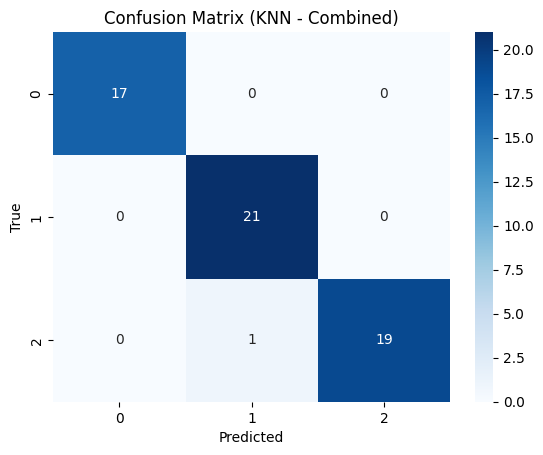

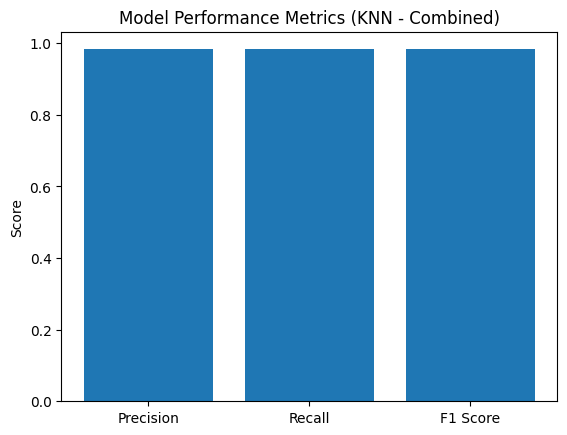

In [19]:
getFigures(confusion_matrices[0], "KNN", precisions[0], recalls[0], f1s[0])

In [20]:
final_models3,confusion_matrices,precisions,recalls,f1s = train_model(final,targets,0.2,classifiers3)

############## Training rnd ##############
rnd accuracy: 100.0 %
[[17  0  0]
 [ 0 21  0]
 [ 0  0 20]]


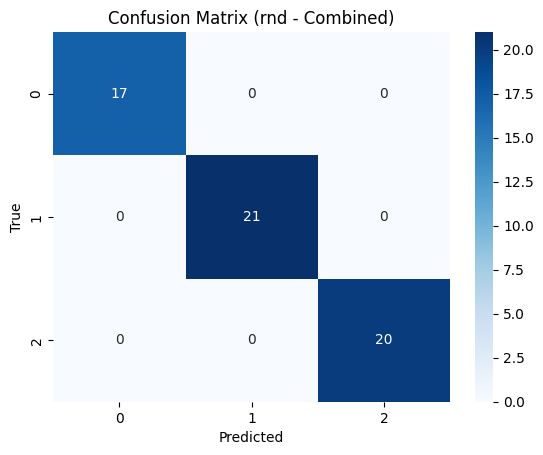

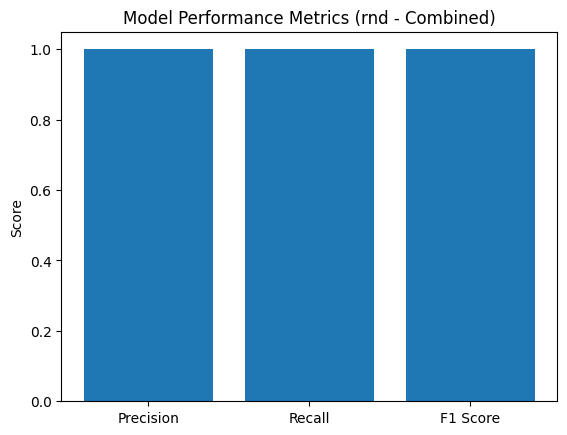

In [21]:
getFigures(confusion_matrices[0], "rnd", precisions[0], recalls[0], f1s[0])

In [22]:
final_models4,confusion_matrices,precisions,recalls,f1s = train_model(final,targets,0.2,classifiers4)

############## Training voting_clf_soft ##############
voting_clf_soft accuracy: 100.0 %
[[17  0  0]
 [ 0 21  0]
 [ 0  0 20]]


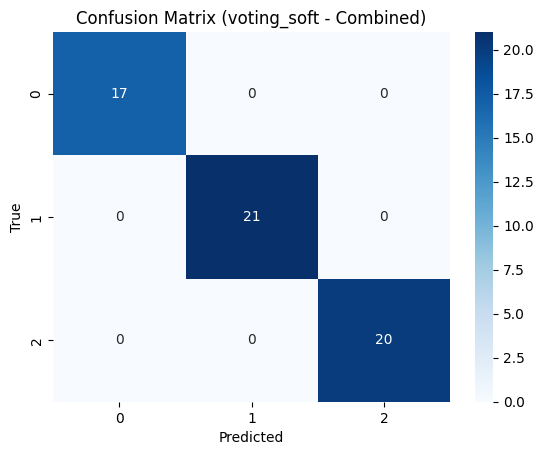

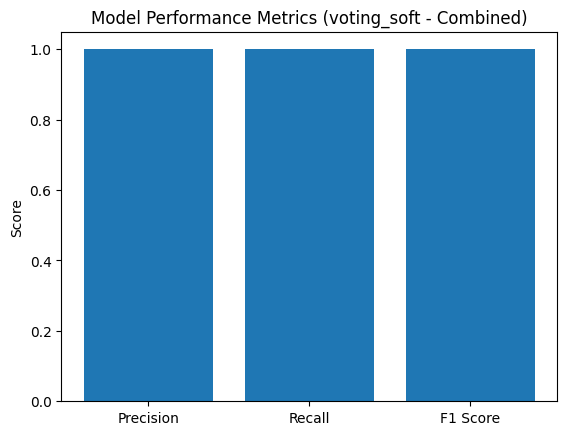

In [23]:
getFigures(confusion_matrices[0], "voting_soft",
           precisions[0], recalls[0], f1s[0])

In [24]:
final_models5,confusion_matrices,precisions,recalls,f1s = train_model(final,targets,0.2,classifiers5)

############## Training voting_clf_hard ##############
voting_clf_hard accuracy: 100.0 %
[[17  0  0]
 [ 0 21  0]
 [ 0  0 20]]


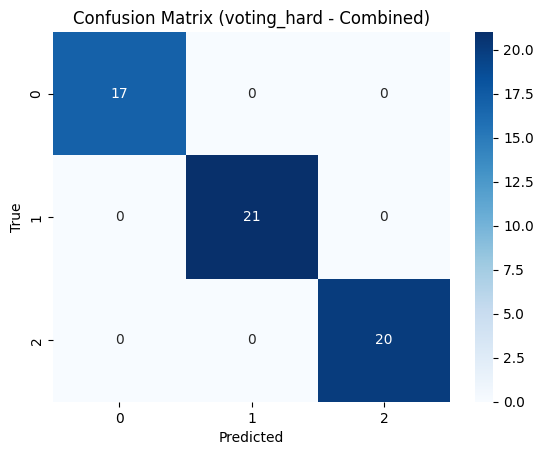

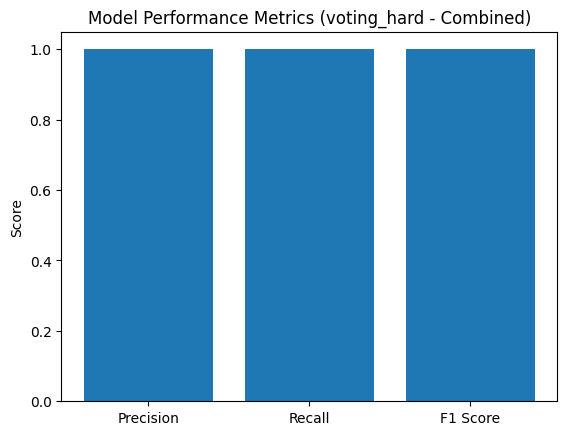

In [25]:
getFigures(confusion_matrices[0], "voting_hard",
           precisions[0], recalls[0], f1s[0])

In [18]:
import pickle

def save_models(modelsArray,suffix):
    for model in modelsArray:
        pickle.dump(next(iter(model.values())), open(
            f"./models/{next(iter(model.keys()))}_{suffix}.pkl", "wb"))

In [19]:
save_models(final_models1,"final")

In [20]:
save_models(final_models2,"final")


In [21]:
save_models(final_models3,"final")


In [22]:
save_models(final_models4,"final")


In [23]:
save_models(final_models5,"final")
